In [4]:
using NetworkDiscovery
using POMDPs
using POMDPToolbox
using POMCP
rng = MersenneTwister(11);

In [50]:
p_intra = 0.3;
p_inter = 0.02;

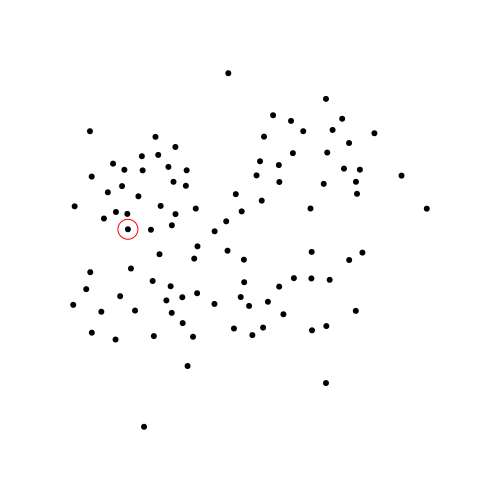

In [51]:
nw = generate_network(rng, 100, 5, p_intra, p_inter)

In [52]:
pomdp = generate_problem(rng, nw, 5, 1, 100.0, 10, 10, p_intra, p_inter)

CommunityAffiliationPOMDP(5,1,100.0,CommunityNetwork({100, 385} undirected graph,5,[5,2,1,5,1,4,1,2,5,5  …  5,2,2,2,5,4,3,2,2,2],5),Set{Int64}({47,32,50,69,40,46,85,43,26,9,17,24,4,3,79,23,27,52,30}),Set{Pair{Int64,Int64}}({edge 23 - 43,edge 26 - 50,edge 46 - 85,edge 40 - 79,edge 24 - 52,edge 32 - 69,edge 3 - 30,edge 4 - 9,edge 27 - 32,edge 17 - 47}),[26=>5,47=>5,4=>5,32=>5,23=>3,50=>5,46=>1],0.3,0.02)

In [53]:
rollout_rng = MersenneTwister(3)
pomcp_rng = MersenneTwister(4)
rollout_policy = DiscoveryHeuristic(ProbeHighestDegree(true), GuessBasedOnNeighbors(rollout_rng))
solver = POMCPSolver(rollout_policy, 0.0, 100.0, 100, pomcp_rng, false, FullBeliefConverter(), 0)
policy = solve(solver, pomdp)

POMCPPolicy(CommunityAffiliationPOMDP(5,1,100.0,CommunityNetwork({100, 385} undirected graph,5,[5,2,1,5,1,4,1,2,5,5  …  5,2,2,2,5,4,3,2,2,2],5),Set{Int64}({47,32,50,69,40,46,85,43,26,9,17,24,4,3,79,23,27,52,30}),Set{Pair{Int64,Int64}}({edge 23 - 43,edge 26 - 50,edge 46 - 85,edge 40 - 79,edge 24 - 52,edge 32 - 69,edge 3 - 30,edge 4 - 9,edge 27 - 32,edge 17 - 47}),[26=>5,47=>5,4=>5,32=>5,23=>3,50=>5,46=>1],0.3,0.02),POMCPSolver(DiscoveryHeuristic(ProbeHighestDegree(true),GuessBasedOnNeighbors(MersenneTwister(DSFMT_state(Int32[-1359582567,1073454075,1934390716,1073583786,-114685834,1073112842,-1913218479,1073122729,-73577195,1073266439  …  1226759590,1072980451,-1366384707,1073012992,1661148031,2121090155,141576524,-658637225,382,0]),Uint32[0x00000003]))),0.0,100.0,100,MersenneTwister(DSFMT_state(Int32[-1125970028,1072950084,1987879523,1073737715,1318759160,1073082403,-665387610,1073002484,775432869,1072783382  …  -1193370493,1072918807,503071495,1073572056,-1375397214,586182507,203824775

In [54]:
revealed = initial_belief(pomdp)

RevealedGraph(Set{Pair{Int64,Int64}}({edge 23 - 43,edge 26 - 50,edge 46 - 85,edge 40 - 79,edge 24 - 52,edge 32 - 69,edge 3 - 30,edge 4 - 9,edge 27 - 32,edge 17 - 47}),[[],[],[30],[9],[],[],[],[],[4],[]  …  [],[],[],[],[],[],[],[],[],[]],Set{Int64}({47,32,50,69,40,46,85,43,26,9,17,24,4,3,79,23,27,52,30}),[26=>5,47=>5,4=>5,32=>5,23=>3,50=>5,46=>1],Set{Int64}({}),5,0.3,0.02,5)

In [55]:
sim = HistoryRecorder(rng=rng, initial_state=nw, initial_belief=revealed)
simulate(sim, pomdp, policy)

100.0

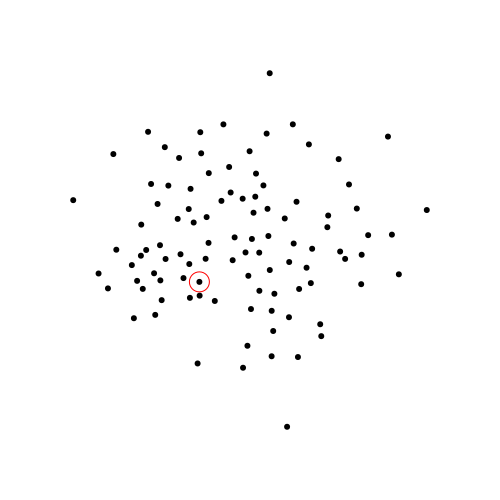

In [56]:
endnw = CommunityNetwork()
rand!(MersenneTwister(3), endnw, sim.belief_hist[end])
endnw

In [57]:
sim.action_hist

6-element Array{Any,1}:
 ProbeNode(17)      
 ProbeNode(27)      
 ProbeNode(37)      
 ProbeNode(82)      
 ProbeNode(89)      
 GuessAffiliation(5)